In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
import random
from sklearn.feature_selection import SequentialFeatureSelector #Para stepwise
from sklearn.linear_model import RidgeCV, Ridge #Para Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [4]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


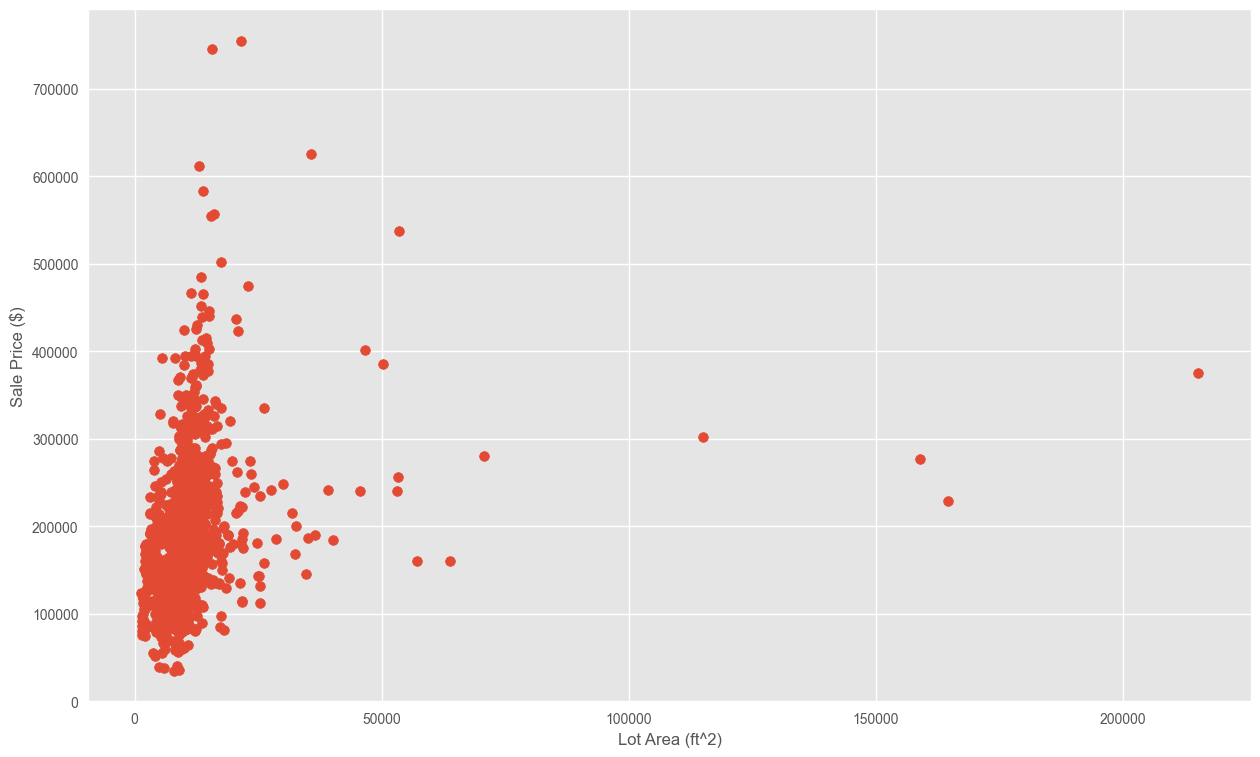

In [5]:
#exploratory data analysis
houses_df.describe()



plt.scatter(houses_df['LotArea'], houses_df['SalePrice'])
plt.xlabel('Lot Area (ft^2)')
plt.ylabel('Sale Price ($)')
plt.show()



In [7]:
numeric_columns = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

numeric = houses_df[numeric_columns]
numeric

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [8]:
numeric = numeric.drop(['BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 
            'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 
            'PoolArea', 'MiscVal'], axis=1)


In [9]:
numeric = numeric[numeric["SalePrice"] < 700000]
numeric = numeric[numeric["LotArea"] < 100000]

In [12]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = numeric.drop("SalePrice", axis=1)
y = numeric["SalePrice"]

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Si se proporciona un conjunto de datos de prueba adicional, se puede usar como conjunto de validación
# Si no, se puede dividir aún más el conjunto de prueba para tener un conjunto de validación separado
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # División 80/20 entre entrenamiento y validación

# Imprimir los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))


Tamaño del conjunto de entrenamiento: 872
Tamaño del conjunto de validación: 291
Tamaño del conjunto de prueba: 291


In [13]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = numeric.drop("SalePrice", axis=1)
y = numeric["SalePrice"]

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba) con semilla aleatoria fijada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Si se proporciona un conjunto de datos de prueba adicional, se puede usar como conjunto de validación
# Si no, se puede dividir aún más el conjunto de prueba para tener un conjunto de validación separado
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # División 80/20 entre entrenamiento y validación

# Imprimir los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))


Tamaño del conjunto de entrenamiento: 872
Tamaño del conjunto de validación: 291
Tamaño del conjunto de prueba: 291


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     931.4
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          1.18e-139
Time:                        10:24:09   Log-Likelihood:                -10732.
No. Observations:                 872   AIC:                         2.147e+04
Df Residuals:                     870   BIC:                         2.148e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7275.6219   6002.035      1.212      0.2

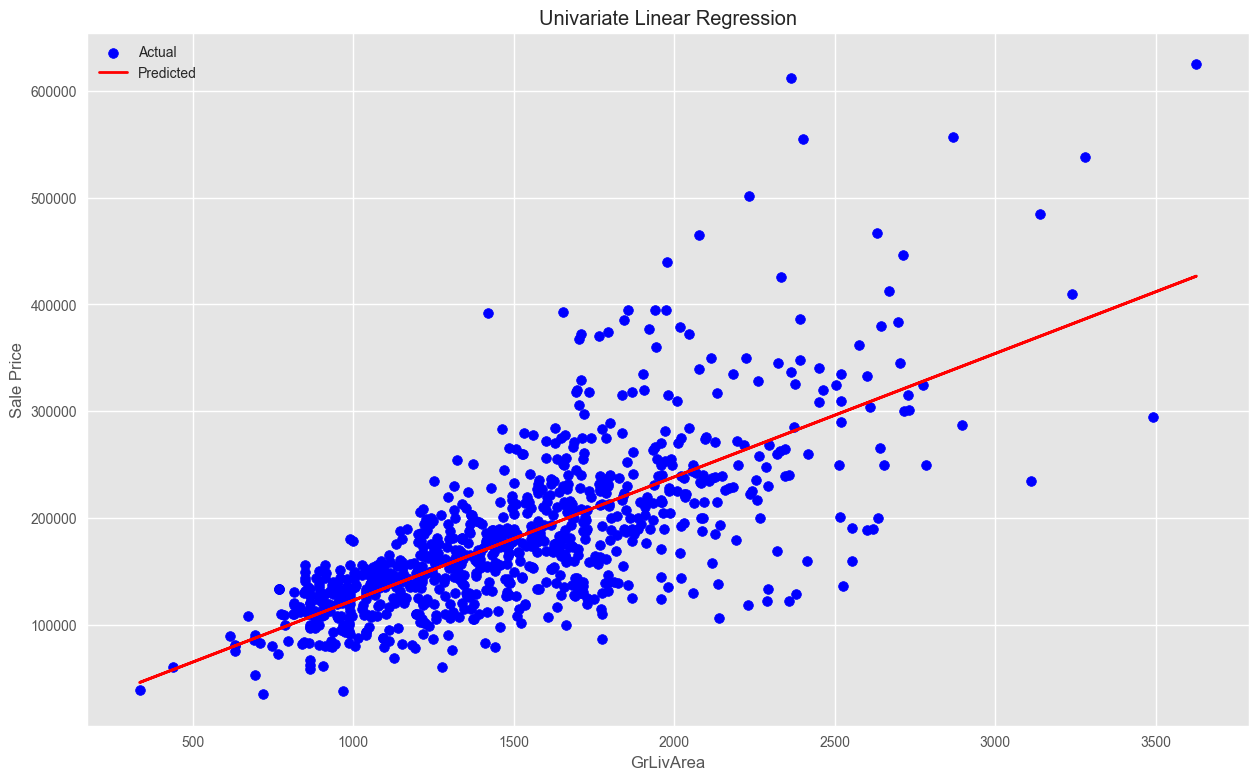

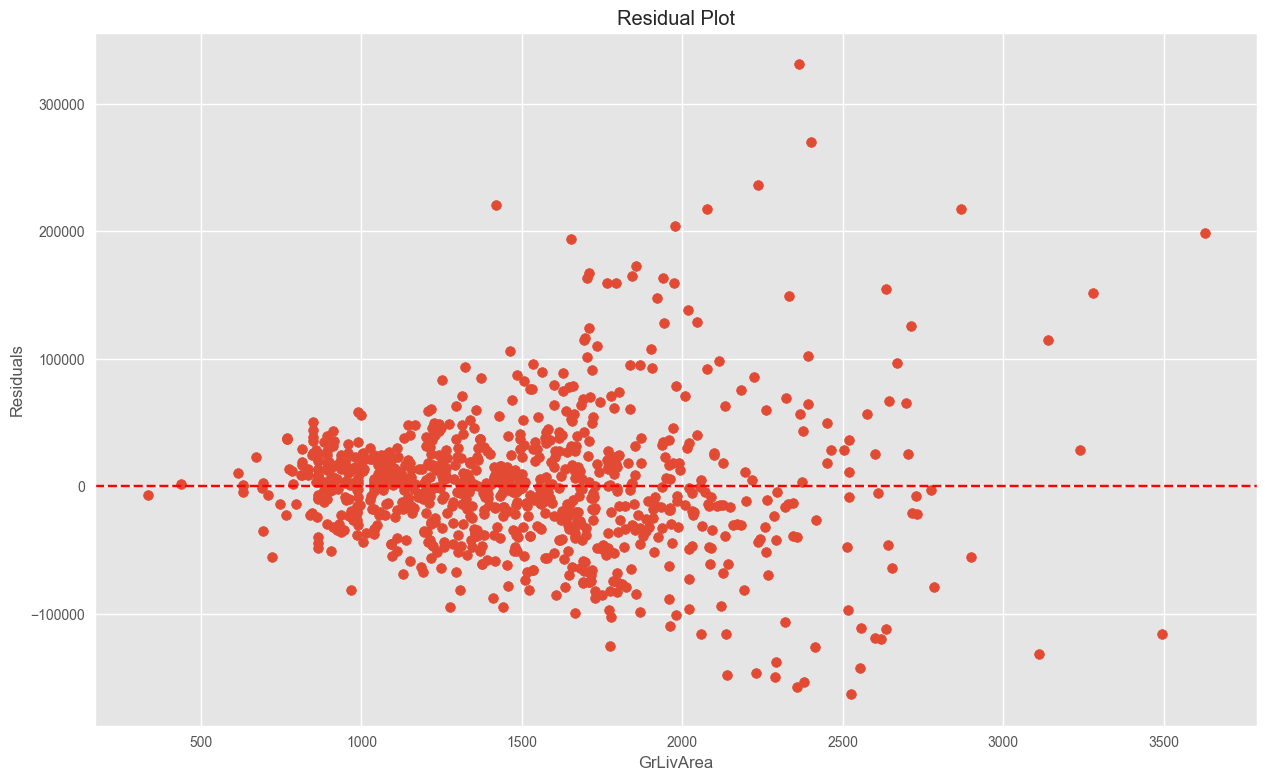

In [14]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Variable predictora
X = X_train['GrLivArea']

# Añadir una constante para el término de intercepción
X = sm.add_constant(X)

# Modelo de regresión lineal
model = sm.OLS(y_train, X).fit()

# Resumen del modelo
print(model.summary())

# Hacer predicciones
predictions = model.predict(X)

# Gráfico de dispersión y línea de regresión
plt.scatter(X_train['GrLivArea'], y_train, color='blue', label='Actual')
plt.plot(X_train['GrLivArea'], predictions, color='red', linewidth=2, label='Predicted')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.title('Univariate Linear Regression')
plt.legend()
plt.show()

# Gráfico de residuos
residuals = y_train - predictions
plt.scatter(X_train['GrLivArea'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('GrLivArea')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     266.3
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:44:02   Log-Likelihood:                -10205.
No. Observations:                 872   AIC:                         2.045e+04
Df Residuals:                     852   BIC:                         2.055e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.921e+06   1.55e+06     -1.241   

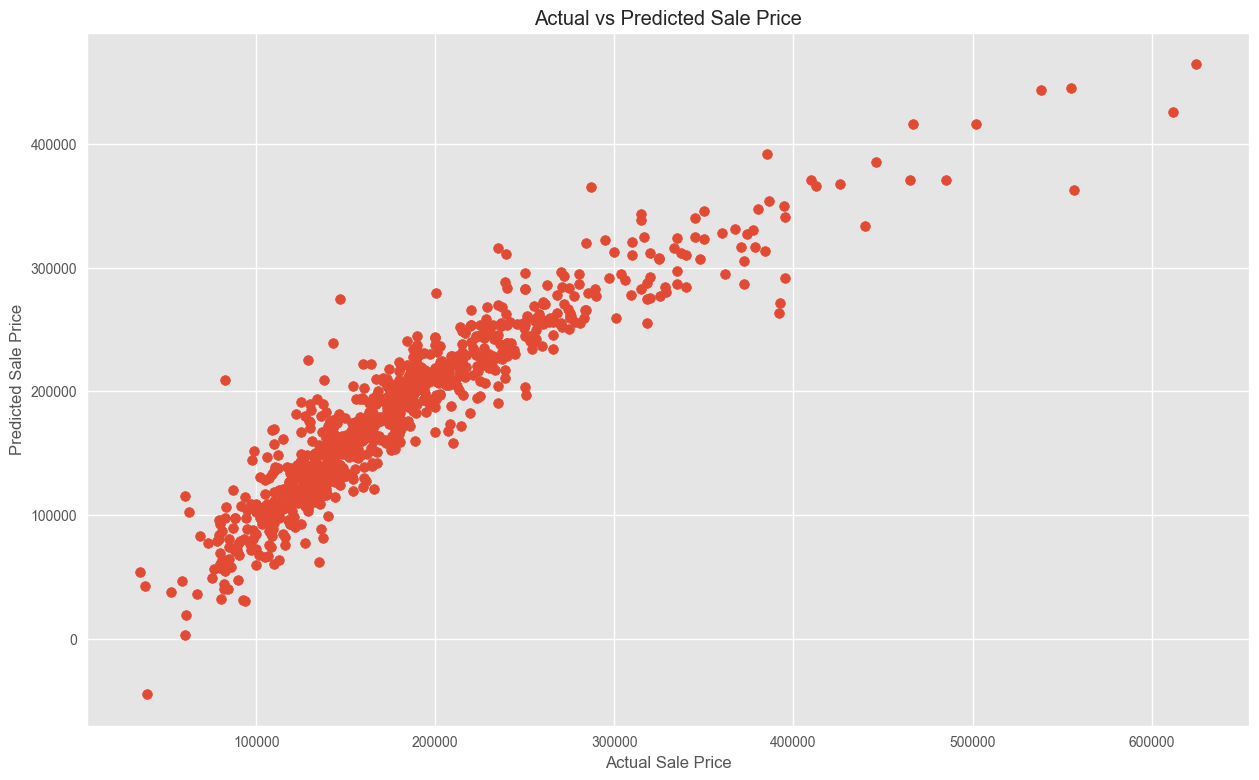

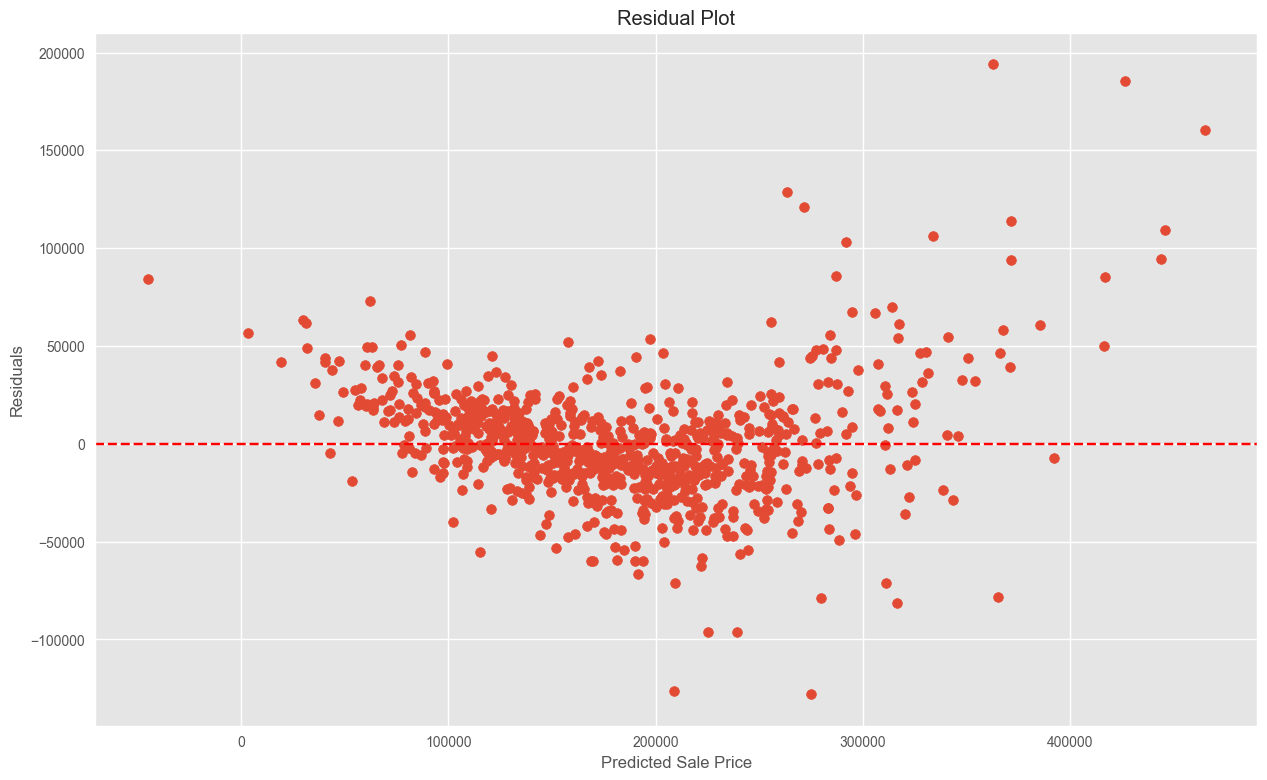

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Añadir una constante para el término de intercepción
X_train_const = sm.add_constant(X_train)

# Modelo de regresión lineal
model = sm.OLS(y_train, X_train_const).fit()

# Resumen del modelo
print(model.summary())

# Hacer predicciones
predictions = model.predict(X_train_const)

# Gráfico de dispersión entre valores reales y predichos
plt.scatter(y_train, predictions)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.show()

# Gráfico de residuos
residuals = y_train - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     266.3
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:55:10   Log-Likelihood:                -10205.
No. Observations:                 872   AIC:                         2.045e+04
Df Residuals:                     852   BIC:                         2.055e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.921e+06   1.55e+06     -1.241   

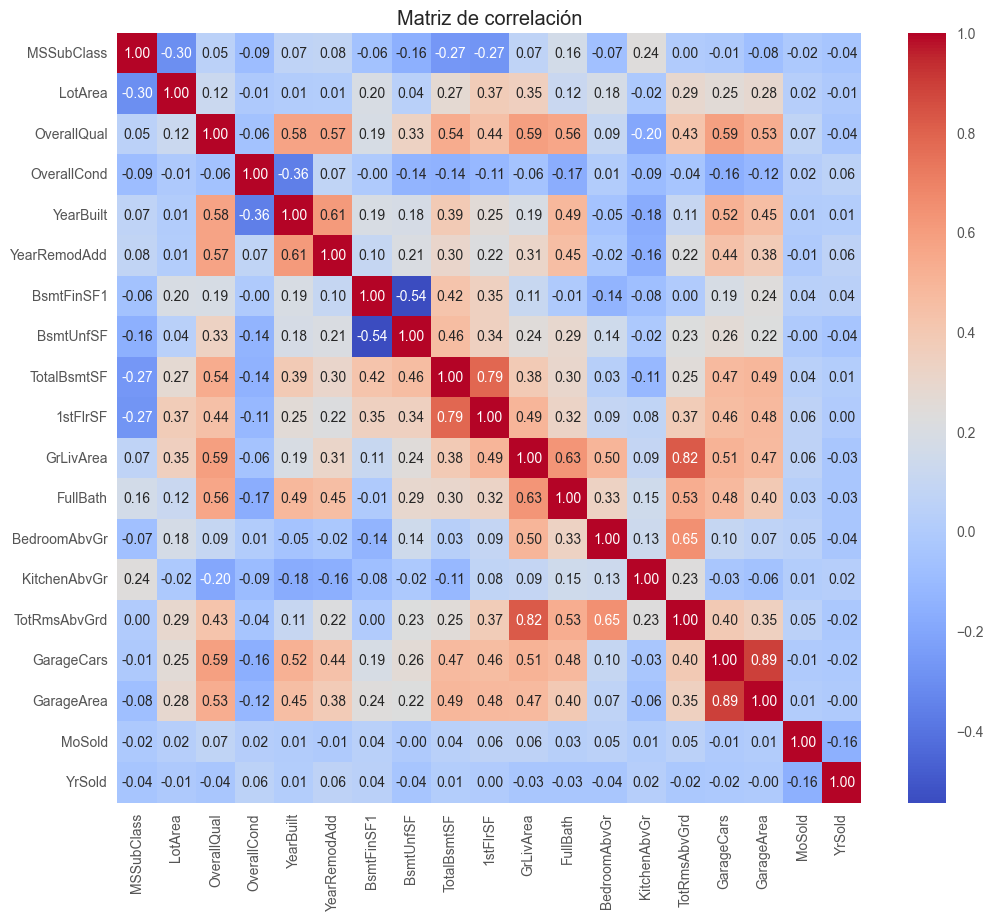

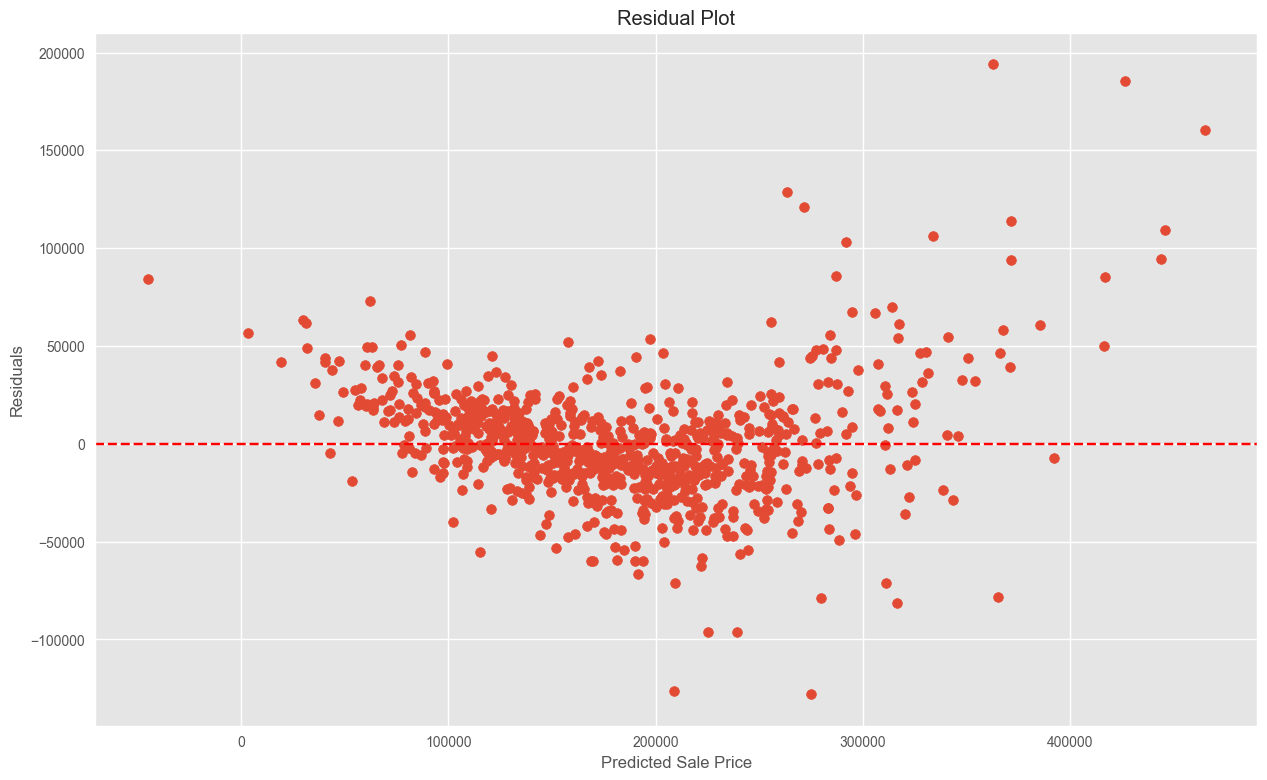


R^2 en los datos de prueba: 0.874887560958672


In [20]:
#Pregunta 9
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Añadir una constante para el término de intercepción
X_train_const = sm.add_constant(X_train)

# Modelo de regresión lineal
model = sm.OLS(y_train, X_train_const).fit()

# Resumen del modelo
print(model.summary())

# Análisis de multicolinealidad (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print("\nAnálisis de multicolinealidad (VIF):")
print(vif_data)

# Matriz de correlación
correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlación")
plt.show()

# Análisis de residuos
residuals = y_train - model.predict(X_train_const)
plt.scatter(model.predict(X_train_const), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Evaluar el modelo en los datos de prueba
X_test_const = sm.add_constant(X_test)
test_predictions = model.predict(X_test_const)
test_residuals = y_test - test_predictions
test_r_squared = r2_score(y_test, test_predictions)
print("\nR^2 en los datos de prueba:", test_r_squared)
